In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from netCDF4 import Dataset

from shallow_water import create_anim

plt.rcParams['animation.html'] = 'html5'
%load_ext autoreload
%autoreload 2

In [2]:
%%time
from rotate_sw import BetaPlaneSW

Lx = Ly = 1e6
dx = dy = 10e3
steps = 20000

sw = BetaPlaneSW(dx, dy, Lx, Ly)
sw.eta[1:-1,1:-1] = sw.set_gaussian(3*Lx/2./4, 0., Lx/15.)
sw.alpha *= 0.8
# sw.eta[1:-1,1:-1] = 0.
# sw.eta[40:60, 40:60] = 0.4
sw.simulate(steps)
sw.print_info()

AttributeError: 'BetaPlaneSW' object has no attribute 'output'

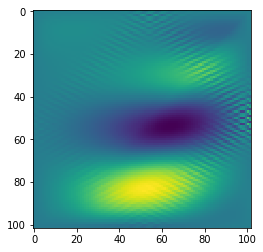

In [7]:
plt.imshow(sw.eta)
plt.show()

In [8]:
with Dataset("SW_L1000000.0_dx10000.0.nc", "r") as df:
#     ETA = df['eta'][:]
    ETA = df['eta'][:,50,25]
#     U = df['uvel'][:]
#     V = df['vvel'][:]
    x = df['x'][:]
    y = df['y'][:]

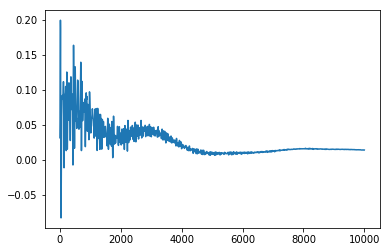

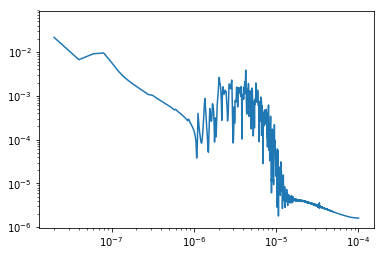

In [9]:
from fourier import npfft

i = 10000; dt = sw.dt
eta = ETA[:i]
plt.plot(eta)
plt.show()

n, fft = npfft(eta)
freq = n/(i*dt)
plt.plot(freq, fft)
plt.loglog()
plt.show()

In [34]:
with Dataset("SW_L1000000.0_dx5000.0.nc", "r") as df:
    ETA = df['eta'][::100]
#     U = df['uvel'][:]
#     V = df['vvel'][:]
    x = df['x'][:]
    y = df['y'][:]

create_anim(x, y, ETA)

In [1]:
%%time
from rotate_sw import BottomFrictionSW

Lx = Ly = 1e6
dx = dy = 10e3
steps = 20000
interval = 1

sw = BottomFrictionSW(dx, dy, Lx, Ly)
sw.eta[1:-1,1:-1] = sw.set_gaussian(3*Lx/4., 0., 5e4)
sw.simulate(steps)
sw.print_info()

100%|██████████| 20000/20000 [00:51<00:00, 391.84it/s]


78.5398163396 78.5398163396
Height:        100.0
Coriolis:      1e-05
Beta:          1e-11
Basin widths:  1000000.0 1000000.0
Grid spacing:  10000.0 x 10000.0
Grid size:     (102, 102)
Rossby radius x = y = 0: 200000.0
CPU times: user 45 s, sys: 3.76 s, total: 48.8 s
Wall time: 1min 8s


In [4]:
with Dataset("SWFric_L1000000.0_dx10000.0.nc", "r") as df:
    etaw = df['eta'][:,50,25]
    etae = df['eta'][:,50,75]

#     U = df['uvel'][:]
#     V = df['vvel'][:]
    x = df['x'][:]
    y = df['y'][:]
    steps = etaw.shape[0]
    dt = df.getncattr('saved_timestep')

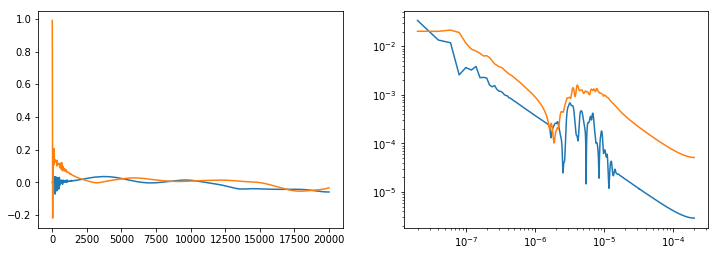

In [5]:
from fourier import npfft

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.plot(etaw)
ax1.plot(etae)

n, fftw = npfft(etaw)
n, ffte = npfft(etae)

freq = n/(steps*dt)
ax2.plot(freq, fftw)
ax2.plot(freq, ffte)
ax2.loglog()
plt.show()

In [7]:
with Dataset("SWFric_L1000000.0_dx10000.0.nc", "r") as df:
    ETA = df['eta'][::100]
#     U = df['uvel'][:]
#     V = df['vvel'][:]
    x = df['x'][:]
    y = df['y'][:]

create_anim(x, y, ETA)